### **Dataset Overview**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train_dataset.csv')
print(df.shape)
df.head()

(38984, 23)


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

In [ ]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,...,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,...,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,...,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


In [ ]:
df.columns
df.dtypes
df['smoking'].value_counts(normalize=True)


,proportion
smoking,
0,0.632721
1,0.367279


This is NOT highly imbalanced.
This is a mild imbalance, and most ML algorithms can handle it without aggressive resampling.

<Axes: >

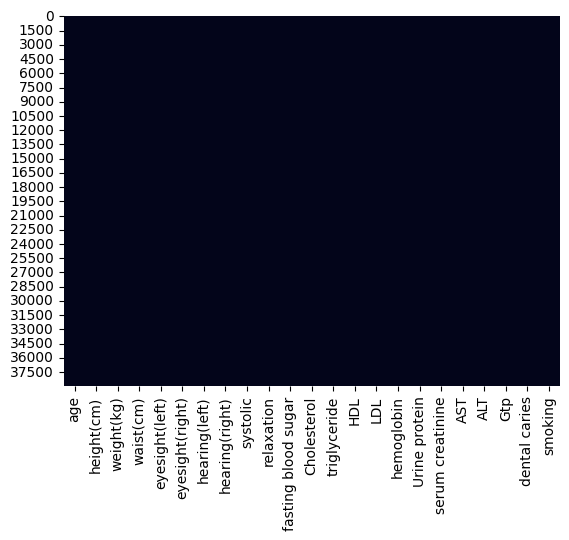

In [ ]:
# Find the total number of missing values in each column
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False)


sns.heatmap(df.isnull()) is showing completely black, that means:
*   There are zero missing values in dataset
*   And the heatmap is filled with False (which plots as dark color)

This is normal when the dataset has no NaNs at all.

In [ ]:
# Check for duplicates
df.duplicated().sum()
df = df.drop_duplicates()


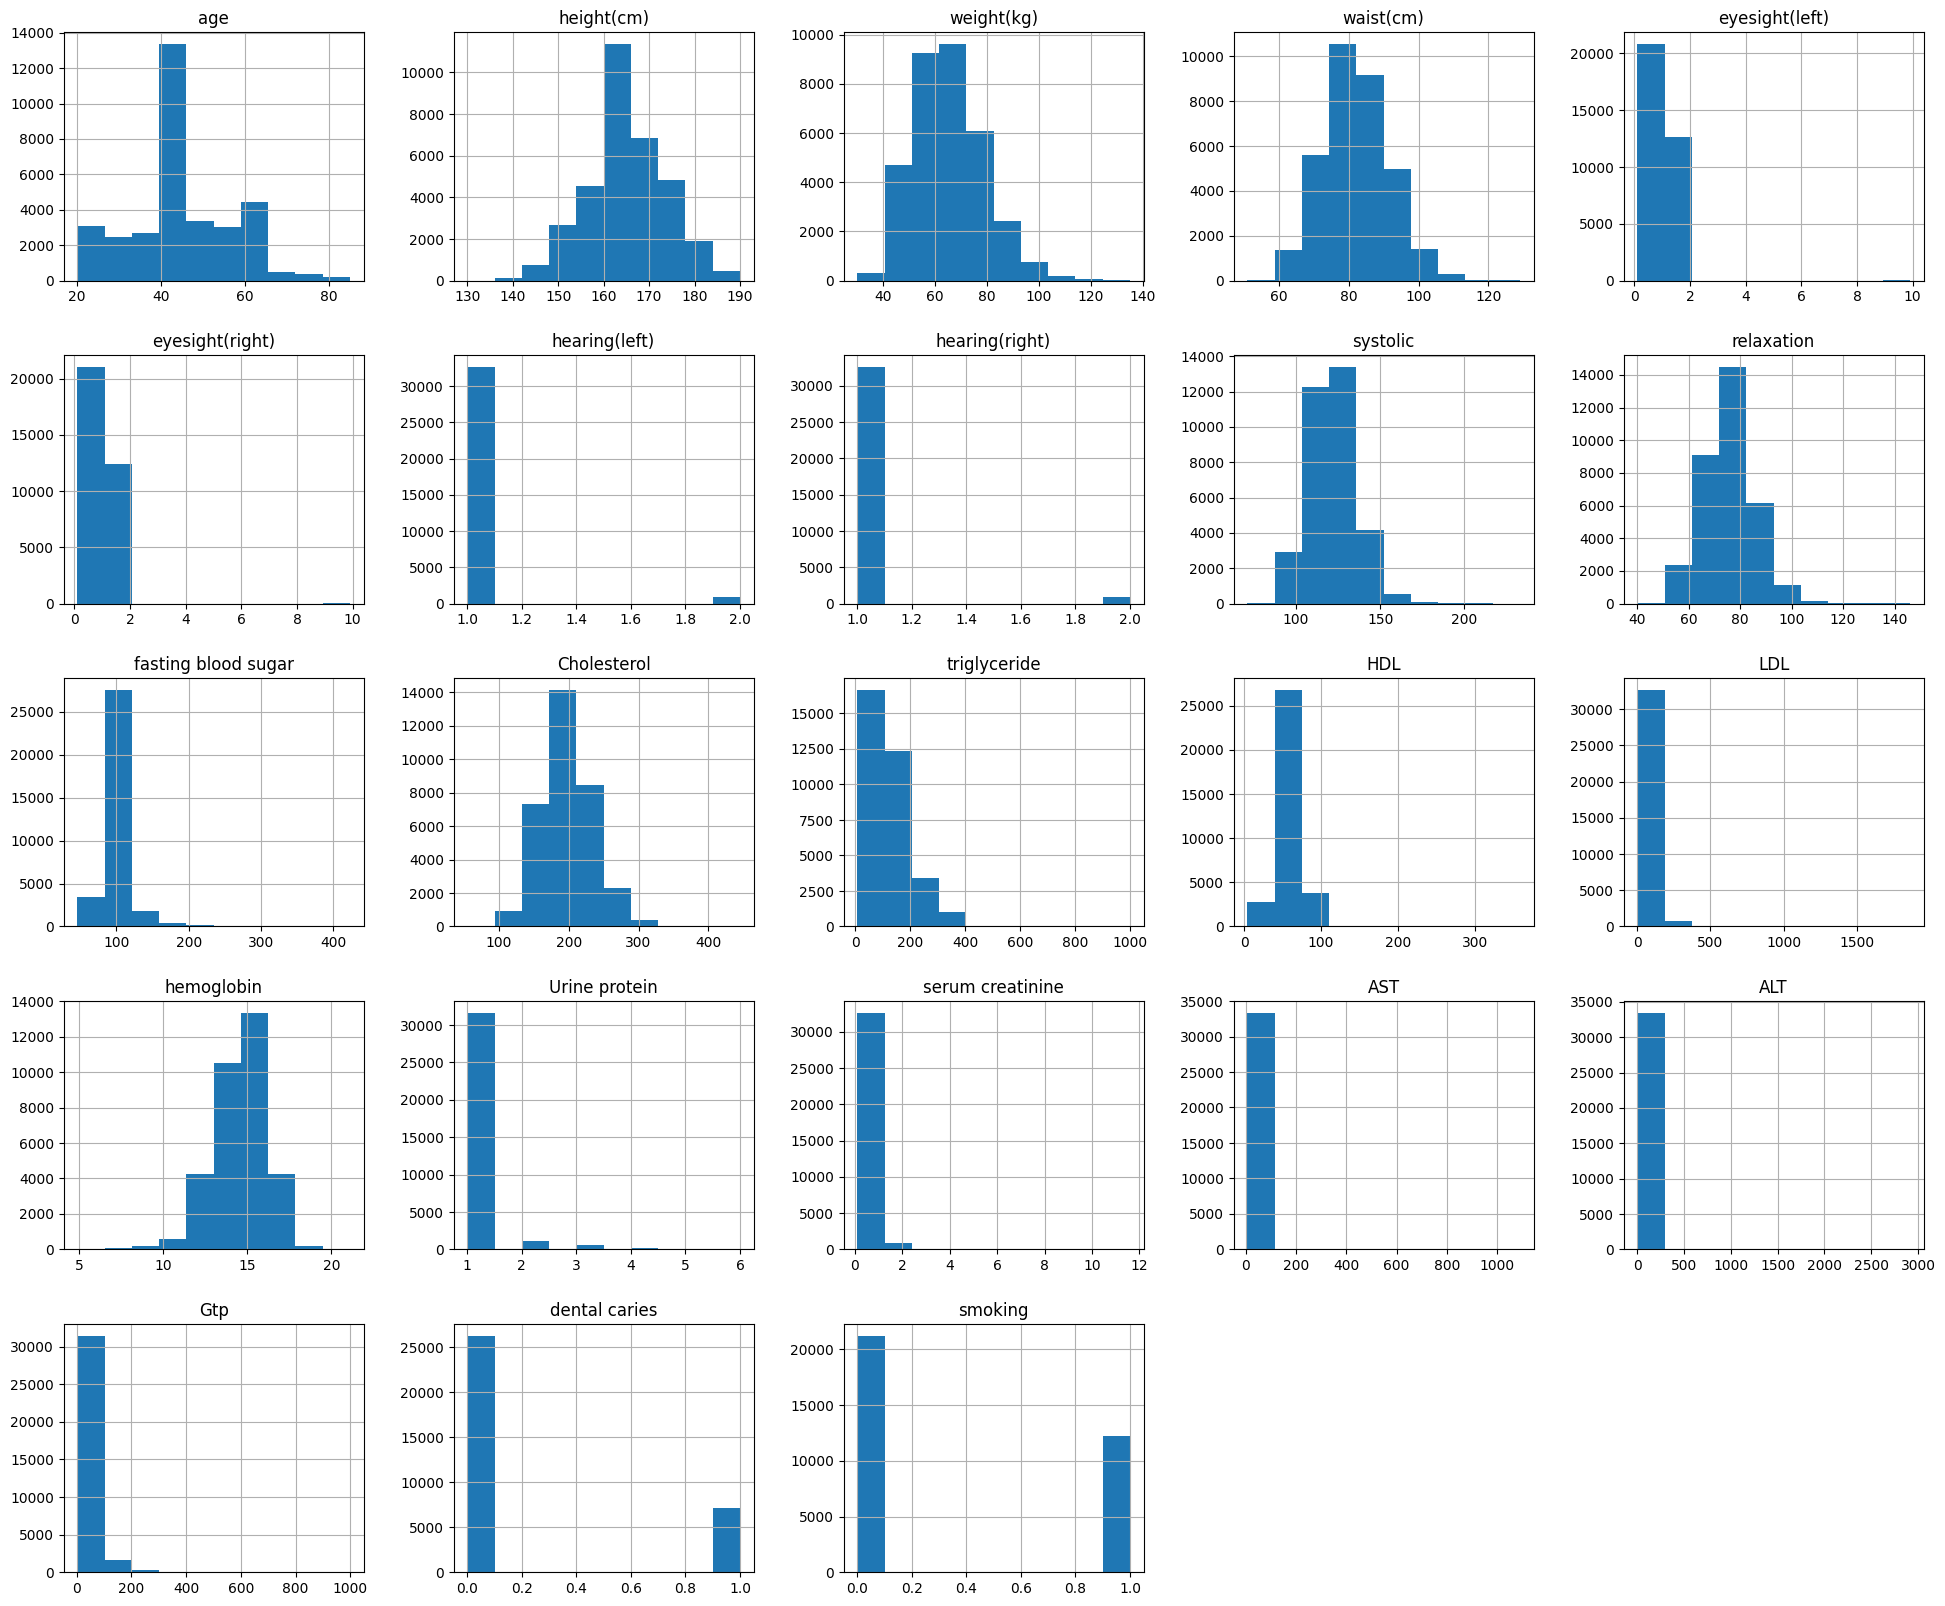

In [ ]:
df.describe()

df.hist(figsize=(24,20))
plt.show()


In [ ]:
categorical_int_features = [col for col in df.columns
                            if df[col].dtype in ['int64', 'int32']
                            and df[col].nunique() <= 10]

categorical_int_features


['hearing(left)',
 'hearing(right)',
 'Urine protein',
 'dental caries',
 'smoking']

In [ ]:
continuous_int_features = [col for col in df.columns
                           if df[col].dtype in ['int64', 'int32']
                           and df[col].nunique() > 10]
continuous_int_features

['age',
 'height(cm)',
 'weight(kg)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'AST',
 'ALT',
 'Gtp']

In [ ]:
df.corr()['smoking'].sort_values(ascending=False)


,smoking
smoking,1.000000
hemoglobin,0.398321
height(cm),0.393353
weight(kg),0.298142
triglyceride,0.249482
Gtp,0.238014
waist(cm),0.222772
serum creatinine,0.209042
dental caries,0.106387
relaxation,0.104472


### **EDA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Categorical-like integer columns: ['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries']
Continuous numeric columns: ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp']


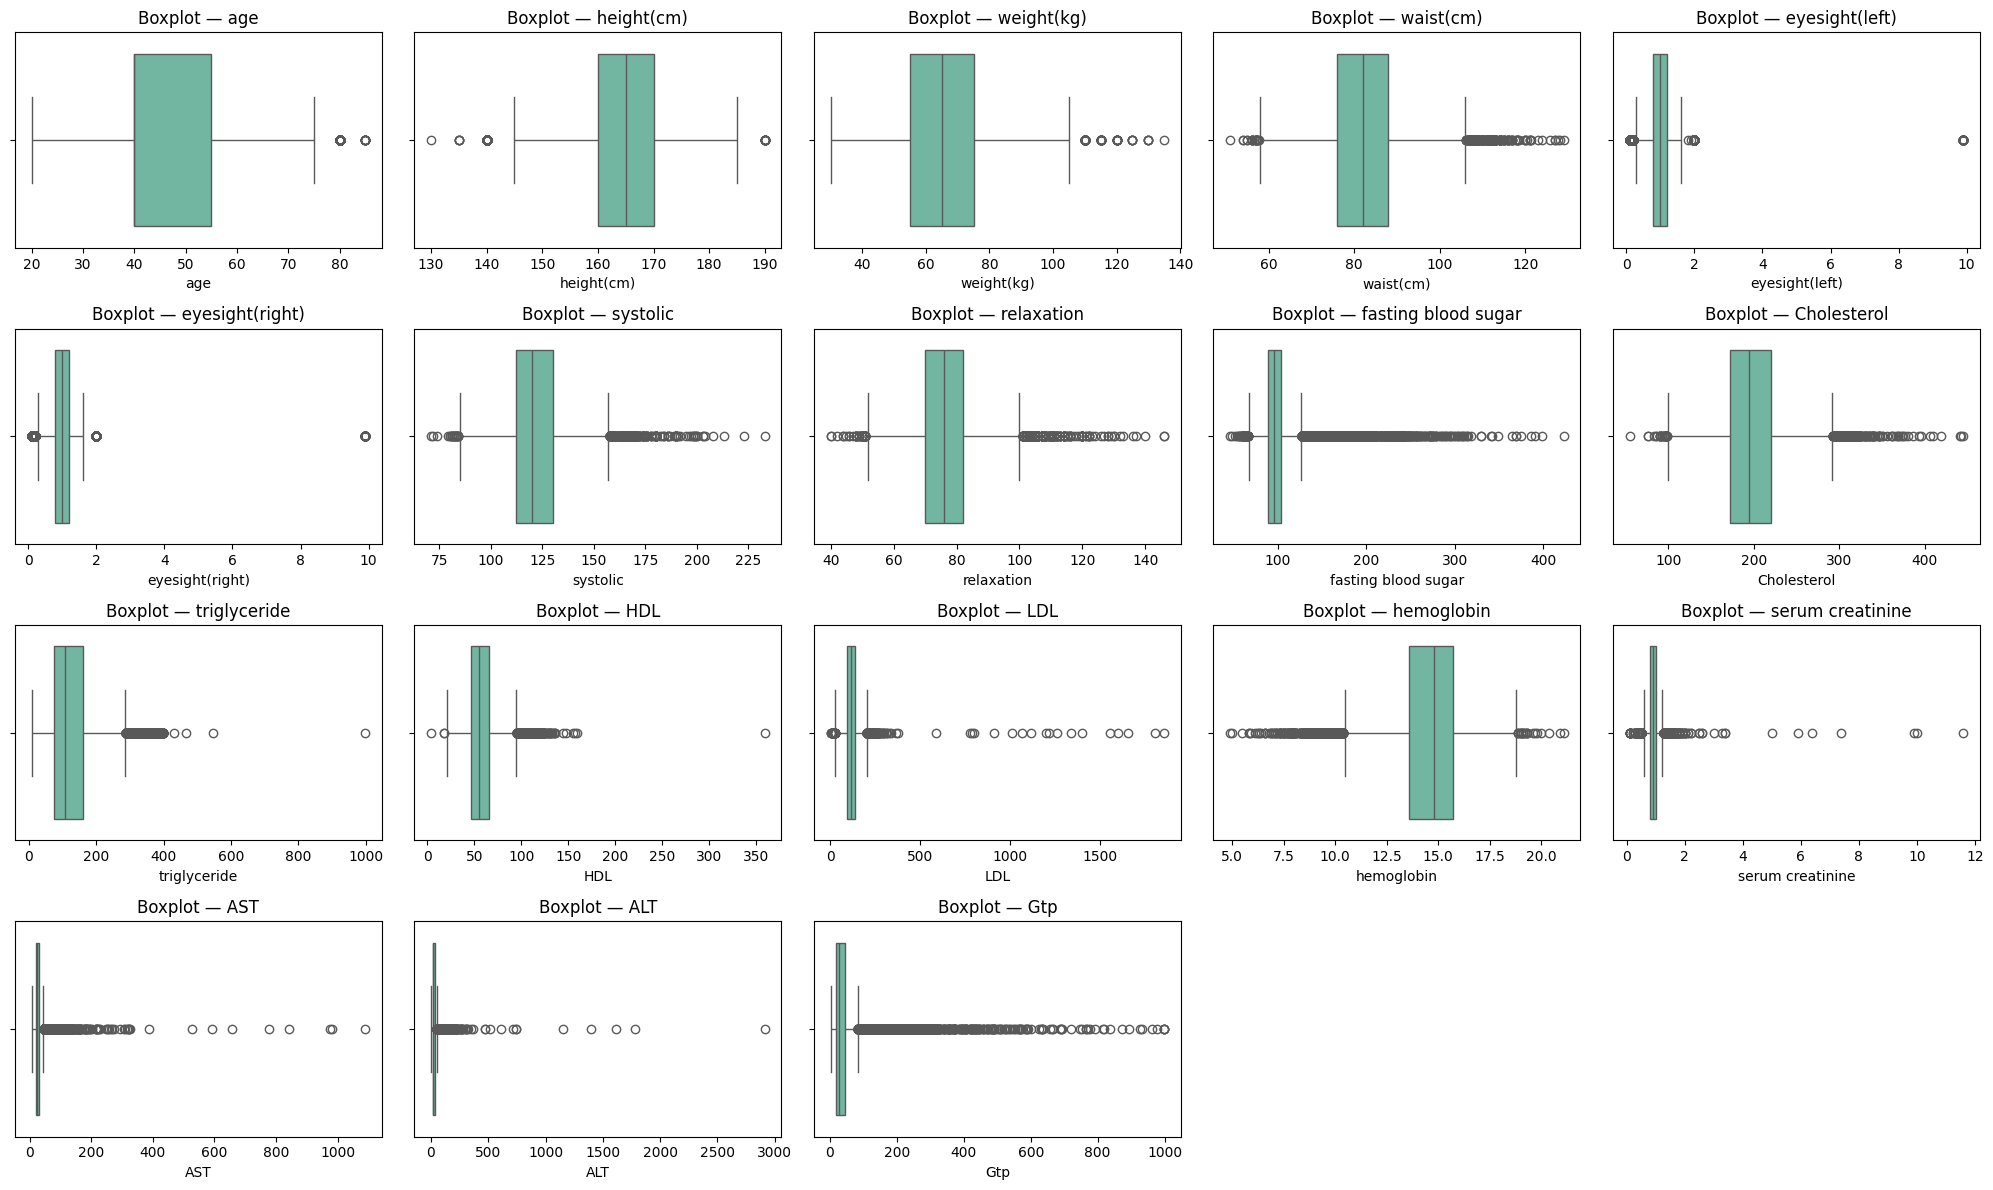

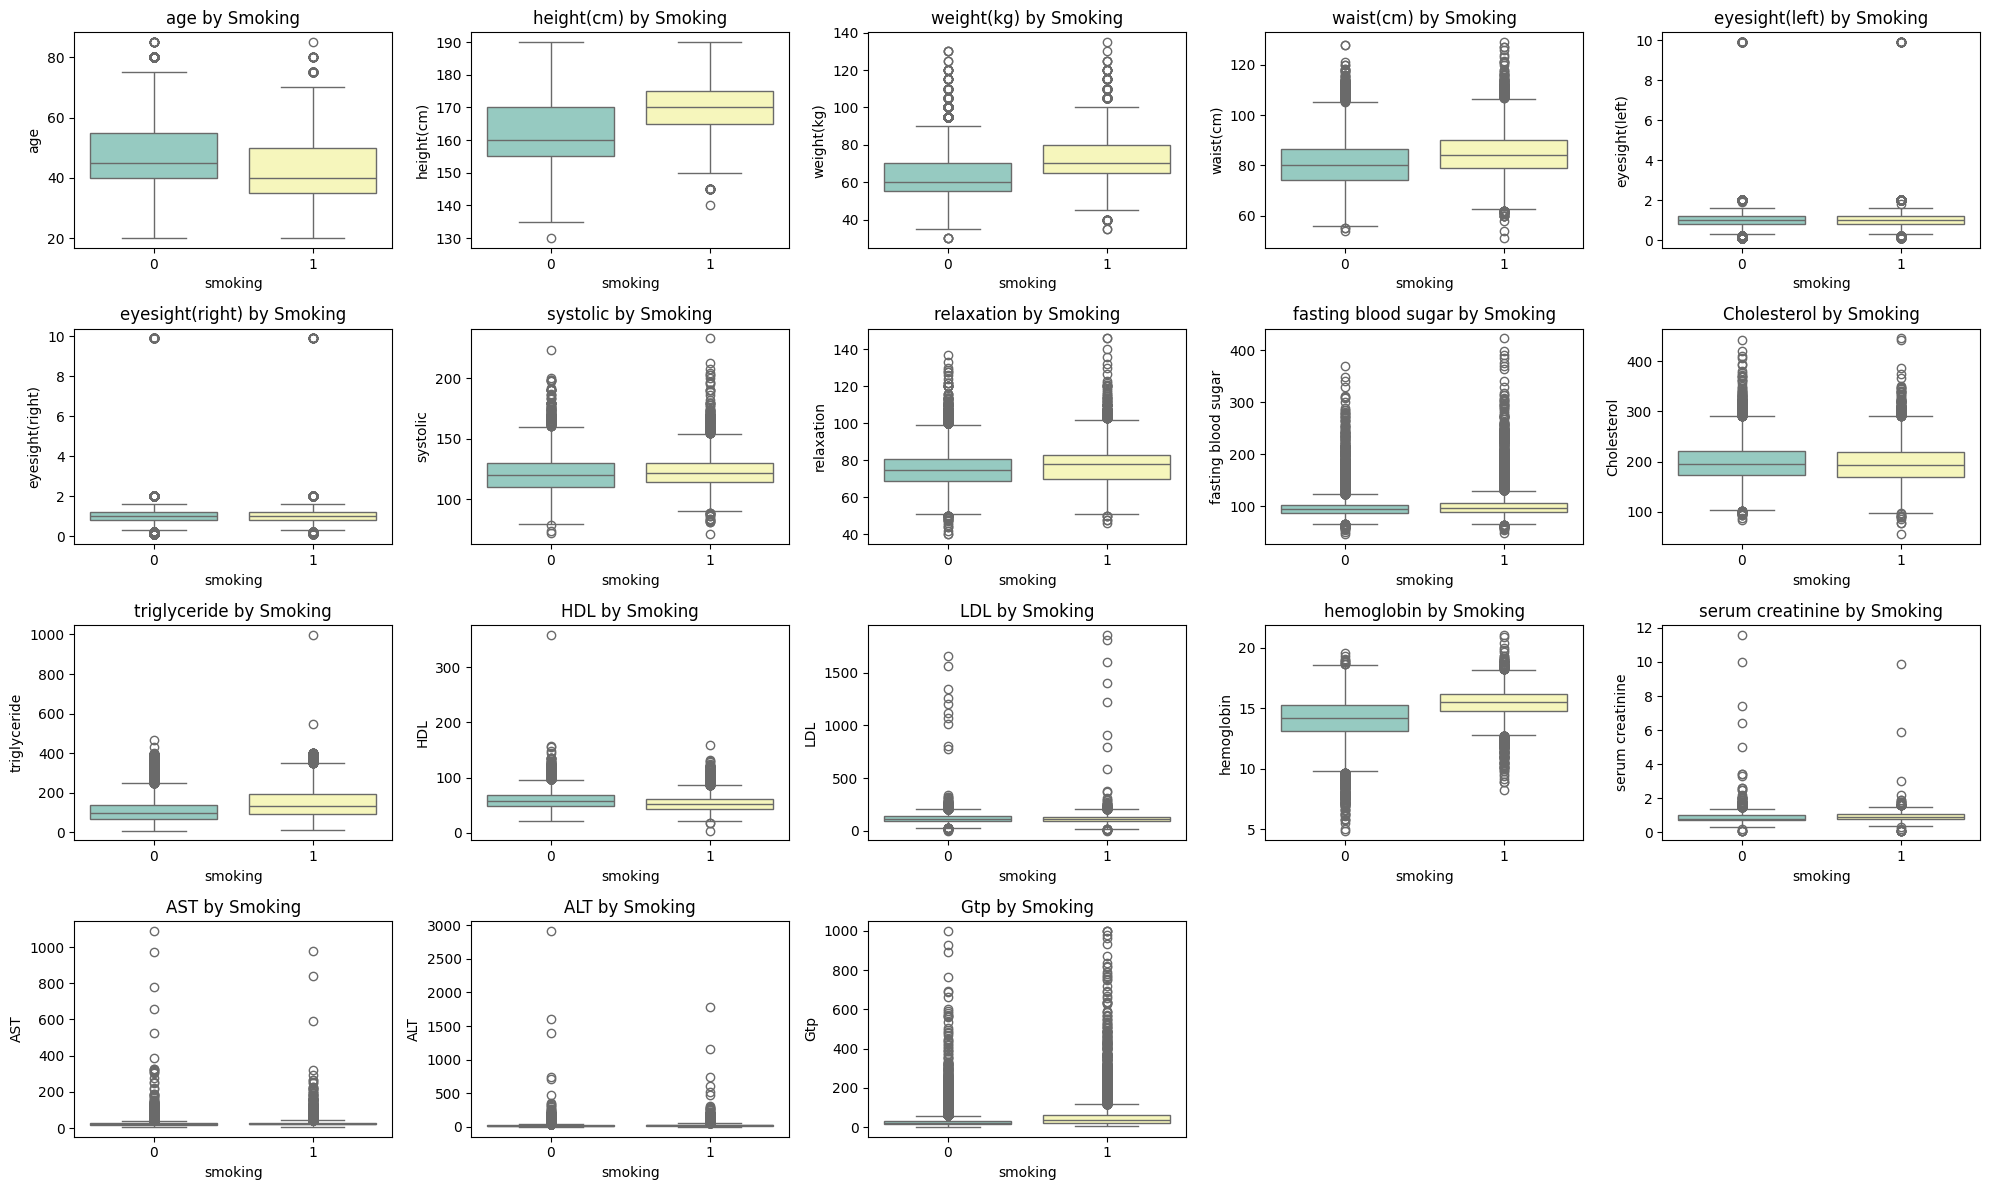

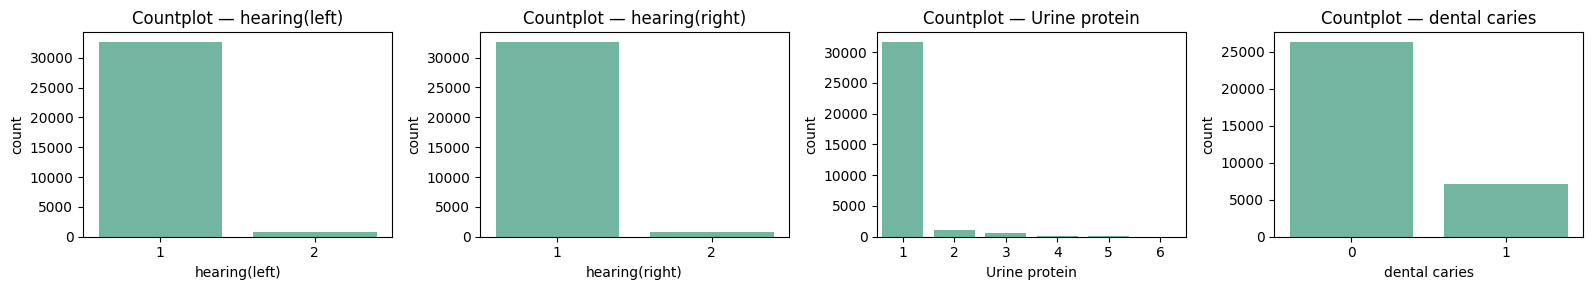

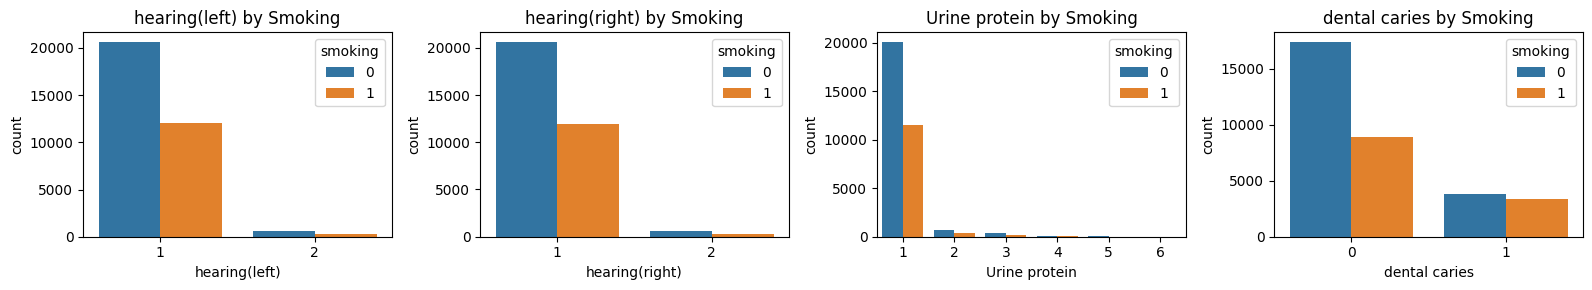

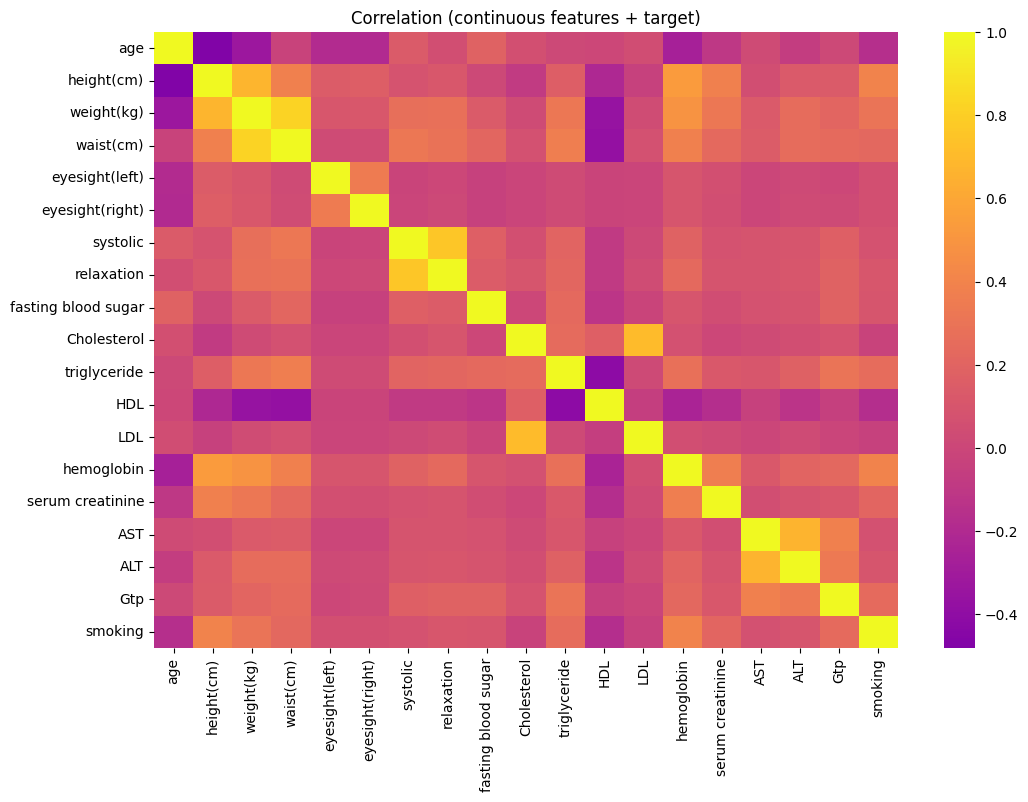


Correlations with smoking:

smoking                1.000000
hemoglobin             0.398321
height(cm)             0.393353
weight(kg)             0.298142
triglyceride           0.249482
Gtp                    0.238014
waist(cm)              0.222772
serum creatinine       0.209042
relaxation             0.104472
fasting blood sugar    0.097833
ALT                    0.097347
systolic               0.070407
AST                    0.063507
eyesight(right)        0.061988
eyesight(left)         0.060057
Cholesterol           -0.029580
LDL                   -0.041953
age                   -0.167149
HDL                   -0.177394
Name: smoking, dtype: float64


In [ ]:
# -------------------------------
# Detect categorical integer columns
# -------------------------------
def detect_categorical_integer_cols(df, threshold_unique=10):
    return [
        col for col in df.select_dtypes(include=['int64','int32']).columns
        if df[col].nunique() <= threshold_unique
    ]

# -------------------------------
# Grid plot helper
# -------------------------------
def plot_grid(plots, titles, cols=5, figscale=(4,3)):
    rows = math.ceil(len(plots) / cols) if len(plots) > 0 else 0
    if rows == 0:
        return
    fig, axes = plt.subplots(rows, cols, figsize=(cols*figscale[0], rows*figscale[1]))
    axes = axes.flatten()

    for i, (plot_fn, title) in enumerate(zip(plots, titles)):
        ax = axes[i]
        plot_fn(ax)
        ax.set_title(title)

    # Hide unused subplots
    for j in range(len(plots), len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# -------------------------------
# Identify feature types
# -------------------------------
categorical_int_cols = detect_categorical_integer_cols(df)
if 'smoking' in categorical_int_cols:
    categorical_int_cols.remove('smoking')

continuous_numeric_cols = [
    col for col in df.select_dtypes(include=['number']).columns
    if col not in categorical_int_cols + ['smoking']
]

print("Categorical-like integer columns:", categorical_int_cols)
print("Continuous numeric columns:", continuous_numeric_cols)

# pick a single color for single-variable plots, and palettes for hue-plots
single_color = sns.color_palette("Set2")[0]
hue_palette = "Set3"    # for boxplots by target
count_hue_palette = "tab10"  # for countplots with hue

# ============================================================
# 1) Boxplots for continuous numeric columns (grid)
# ============================================================
plots = []
titles = []
for col in continuous_numeric_cols:
    # capture col & color to avoid late-binding
    plots.append(lambda ax, c=col, colr=single_color: sns.boxplot(x=df[c], ax=ax, color=colr))
    titles.append(f"Boxplot — {col}")
plot_grid(plots, titles, cols=5)

# ============================================================
# 2) Continuous features vs smoking (grid)  -- colorful, no warnings
# ============================================================
plots = []
titles = []
for col in continuous_numeric_cols:
    def plot_fn(ax, c=col):
        sns.boxplot(
            x='smoking',
            y=c,
            data=df,
            hue='smoking',
            palette=hue_palette,
            dodge=False,
            ax=ax
        )
        # remove duplicate legend (we only want x-axis labels)
        if ax.get_legend() is not None:
            ax.get_legend().remove()
    plots.append(plot_fn)
    titles.append(f"{col} by Smoking")
plot_grid(plots, titles, cols=5)

# ============================================================
# 3) Countplots for categorical-like integer columns (grid)
# ============================================================
plots = []
titles = []
for col in categorical_int_cols:
    plots.append(lambda ax, c=col, colr=single_color: sns.countplot(x=c, data=df, ax=ax, color=colr))
    titles.append(f"Countplot — {col}")
plot_grid(plots, titles, cols=5)

# ============================================================
# 4) Categorical vs smoking (grid)  -- use palette for hue
# ============================================================
plots = []
titles = []
for col in categorical_int_cols:
    plots.append(lambda ax, c=col: sns.countplot(x=c, hue='smoking', data=df, ax=ax, palette=count_hue_palette))
    titles.append(f"{col} by Smoking")
plot_grid(plots, titles, cols=5)

# ============================================================
# 5) Correlation heatmap
# ============================================================
if continuous_numeric_cols:
    plt.figure(figsize=(12,8))
    corr = df[continuous_numeric_cols + ['smoking']].corr()
    sns.heatmap(corr, annot=False, cmap="plasma", center=0)
    plt.title("Correlation (continuous features + target)")
    plt.show()

    print("\nCorrelations with smoking:\n")
    print(corr['smoking'].sort_values(ascending=False))


### **Prepare Data for Models**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
)

from sklearn.linear_model import LogisticRegression

In [ ]:
# -----------------------
# Prepare data
# -----------------------
X = df.drop('smoking', axis=1)
y = df['smoking']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train class distribution:\n", y_train.value_counts(normalize=True))

# -----------------------
# Scaling
# -----------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------
# CV and scoring
# -----------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = 'f1'

def evaluate_model(estimator, X_test, y_test, name="Model"):
    """
    Evaluate model – AUC metrics removed.
    """
    y_pred = estimator.predict(X_test)

    print(f"\n--- {name} evaluation ---")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("F1       :", f1_score(y_test, y_pred))
    print("\nClassification report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Train shape: (26773, 22) Test shape: (6694, 22)
Train class distribution:
 smoking
0    0.633735
1    0.366265
Name: proportion, dtype: float64


### **Logistic Regression**

Fitting 5 folds for each of 4 candidates, totalling 20 fits

=== Logistic Regression ===
Best CV score: 0.673681730678277
Best params: {'clf__C': 1, 'clf__class_weight': 'balanced'}

--- Logistic Regression evaluation ---
Accuracy : 0.7137735285330147
F1       : 0.663623595505618

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.68      0.75      4242
           1       0.58      0.77      0.66      2452

    accuracy                           0.71      6694
   macro avg       0.71      0.73      0.71      6694
weighted avg       0.74      0.71      0.72      6694



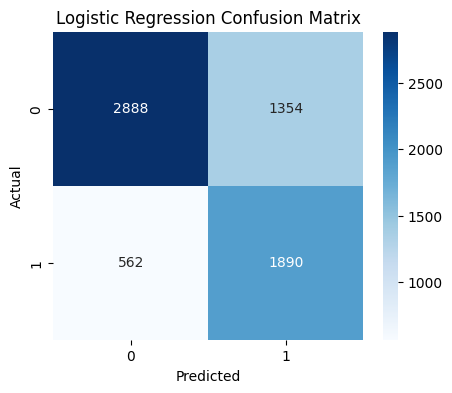

In [ ]:
# -----------------------
# Logistic Regression (Grid Search)
# -----------------------
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=2000, random_state=42))
])

param_grid_lr = {
    'clf__C': [0.1, 1],
    'clf__class_weight': [None, 'balanced']
}

gs_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=cv, scoring=scoring, n_jobs=-1, verbose=1)
gs_lr.fit(X_train, y_train)

print("\n=== Logistic Regression ===")
print("Best CV score:", gs_lr.best_score_)
print("Best params:", gs_lr.best_params_)

evaluate_model(gs_lr.best_estimator_, X_test, y_test, name="Logistic Regression")


### **KMeans Algo**


=== KMeans Clustering Experiments ===

KMeans Evaluation Summary:
 n_clusters  Accuracy  F1 Score  Silhouette
          2  0.671945  0.637265    0.137029
          3  0.672543  0.631349    0.142285

=== Best KMeans Model Evaluation ===
Best n_clusters: 2
Best F1 Score  : 0.6372646184340932


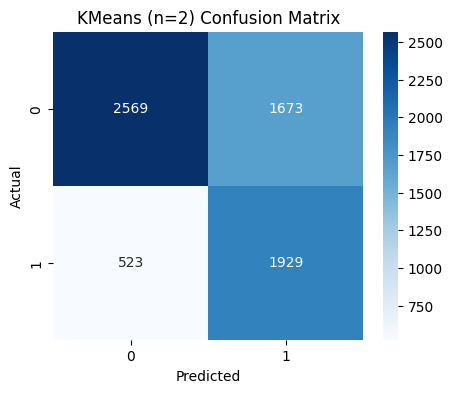

In [ ]:
# -----------------------
# KMeans
# -----------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    silhouette_score
)

kmeans_params = {
    'n_clusters': [2, 3],
    'init': ['k-means++'],
    'n_init': [10]
}

def map_clusters_to_labels(cluster_labels, true_labels):
    """Map each cluster to the majority class label."""
    mapping = {}
    for c in np.unique(cluster_labels):
        mask = (cluster_labels == c)
        majority_class = np.bincount(true_labels[mask]).argmax()
        mapping[c] = majority_class
    return mapping

print("\n=== KMeans Clustering Experiments ===")
best_km = None
best_km_f1 = -1

results = []  # store metrics

for n in kmeans_params['n_clusters']:

    km = KMeans(n_clusters=n, init='k-means++', n_init=10, random_state=42)
    km.fit(X_train_scaled)

    # cluster assignments on training data
    train_clusters = km.labels_
    mapping = map_clusters_to_labels(train_clusters, y_train.values)

    # test predictions
    test_clusters = km.predict(X_test_scaled)
    y_pred = np.array([mapping[c] for c in test_clusters])

    # metrics (ARI + NMI removed)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    sil = silhouette_score(X_test_scaled, test_clusters) if len(np.unique(test_clusters)) > 1 else np.nan

    results.append([n, accuracy, f1, sil])

    # best model by F1
    if f1 > best_km_f1:
        best_km_f1 = f1
        best_km = km

# -----------------------
# Display results
# -----------------------
results_df = pd.DataFrame(
    results,
    columns=["n_clusters", "Accuracy", "F1 Score", "Silhouette"]
)

print("\nKMeans Evaluation Summary:")
print(results_df.to_string(index=False))

# -----------------------
# Confusion Matrix for Best KMeans
# -----------------------
print("\n=== Best KMeans Model Evaluation ===")
print("Best n_clusters:", best_km.n_clusters)
print("Best F1 Score  :", best_km_f1)

best_test_clusters = best_km.predict(X_test_scaled)
best_mapping = map_clusters_to_labels(best_km.predict(X_train_scaled), y_train.values)
best_y_pred = np.array([best_mapping[c] for c in best_test_clusters])

cm = confusion_matrix(y_test, best_y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"KMeans (n={best_km.n_clusters}) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### **GMM Implementation**


=== GMM Clustering Experiments ===

GMM Evaluation Summary:
 n_components  Accuracy  F1 Score  Silhouette
            2  0.633702       0.0    0.241939
            3  0.633702       0.0    0.212413

=== Best GMM Model Evaluation ===
Best n_components: 2
Best F1 Score  : 0.0


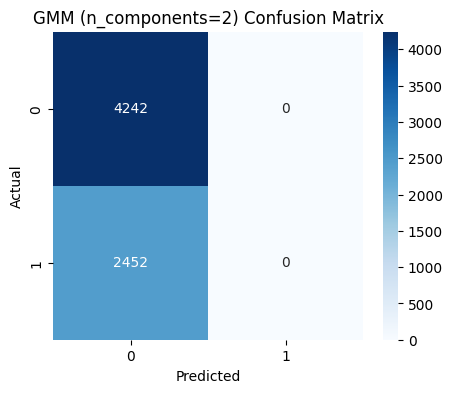

In [ ]:
# -----------------------
# GMM
# -----------------------
from sklearn.mixture import GaussianMixture

gmm_params = {
    'n_components': [2, 3],
    'covariance_type': ['full'],
    'n_init': 10
}

def map_components_to_labels(comp_labels, true_labels):
    """Map each GMM component to the majority class label (0/1)."""
    mapping = {}
    for c in np.unique(comp_labels):
        mask = (comp_labels == c)
        majority_class = np.bincount(true_labels[mask]).argmax()
        mapping[c] = majority_class
    return mapping

print("\n=== GMM Clustering Experiments ===")
best_gmm = None
best_gmm_f1 = -1
gmm_results = []

for k in gmm_params['n_components']:
    # build GMM
    gmm = GaussianMixture(
        n_components=k,
        covariance_type='full',
        n_init=gmm_params['n_init'],
        random_state=42
    )
    gmm.fit(X_train_scaled)

    # component assignments on train
    train_components = gmm.predict(X_train_scaled)
    mapping = map_components_to_labels(train_components, y_train.values)

    # test component assignments and mapped predictions
    test_components = gmm.predict(X_test_scaled)
    y_pred = np.array([mapping[c] for c in test_components])

    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    sil = silhouette_score(X_test_scaled, test_components) if len(np.unique(test_components)) > 1 else np.nan

    # store results
    gmm_results.append([k, accuracy, f1, sil])

    # choose best model by F1
    if f1 > best_gmm_f1:
        best_gmm_f1 = f1
        best_gmm = gmm

# -----------------------
# Display results
# -----------------------
gmm_results_df = pd.DataFrame(
    gmm_results,
    columns=["n_components", "Accuracy", "F1 Score", "Silhouette"]
)

print("\nGMM Evaluation Summary:")
print(gmm_results_df.to_string(index=False))

# -----------------------
# Confusion matrix for best GMM
# -----------------------
if best_gmm is not None:
    print("\n=== Best GMM Model Evaluation ===")
    # predict using best GMM
    best_train_comps = best_gmm.predict(X_train_scaled)
    best_mapping = map_components_to_labels(best_train_comps, y_train.values)

    best_test_comps = best_gmm.predict(X_test_scaled)
    best_y_pred = np.array([best_mapping[c] for c in best_test_comps])

    print("Best n_components:", best_gmm.n_components)
    print("Best F1 Score  :", best_gmm_f1)

    cm = confusion_matrix(y_test, best_y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"GMM (n_components={best_gmm.n_components}) Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
else:
    print("No GMM model was fitted.")


### **SVM With Gridsearchcv**

Fitting 5 folds for each of 18 candidates, totalling 90 fits

=== GridSearchCV Results ===
Best CV accuracy : 0.7459007968770873
Best parameters  : {'svc__C': 1, 'svc__class_weight': None, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

=== Test Set Performance ===
Test Accuracy : 0.7397669554825217
Test F1 Macro: 0.7162265225740241

Classification Report:
               precision    recall  f1-score   support

           0     0.7854    0.8109    0.7980      4242
           1     0.6534    0.6166    0.6345      2452

    accuracy                         0.7398      6694
   macro avg     0.7194    0.7138    0.7162      6694
weighted avg     0.7370    0.7398    0.7381      6694



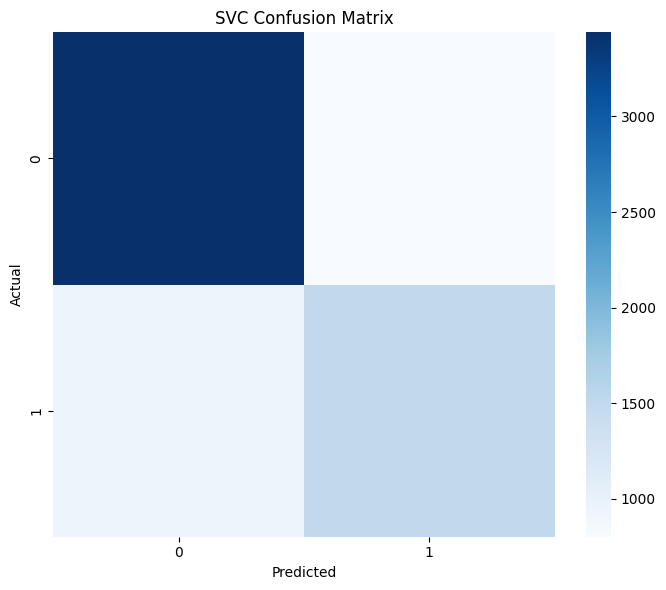

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------
# Pipeline
# -----------------------
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# -----------------------
# Parameter Grid (conditional)
# -----------------------
param_grid = [
    {
        "svc__kernel": ["linear"],
        "svc__C": [0.1, 1, 10],
        "svc__class_weight": [None, "balanced"]
    },
    {
        "svc__kernel": ["rbf"],
        "svc__C": [0.1, 1, 10],
        "svc__class_weight": [None, "balanced"],
        "svc__gamma": ["scale", "auto"]
    }
]

# -----------------------
# GridSearchCV
# -----------------------
gs = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="accuracy",     # or "f1_macro" for multiclass optimization
    cv=5,
    n_jobs=-1,
    verbose=2,
    refit=True
)

gs.fit(X_train, y_train)

# -----------------------
# Best Results
# -----------------------
print("\n=== GridSearchCV Results ===")
print("Best CV accuracy :", gs.best_score_)
print("Best parameters  :", gs.best_params_)

# -----------------------
# Test Set Evaluation
# -----------------------
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

test_acc = accuracy_score(y_test, y_pred)
test_f1_macro = f1_score(y_test, y_pred, average="macro")

print("\n=== Test Set Performance ===")
print("Test Accuracy :", test_acc)
print("Test F1 Macro:", test_f1_macro)
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

# -----------------------
# Confusion Matrix
# -----------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("SVC Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


### **Neural Network with Gridsearchcv**

Fitting 5 folds for each of 3 candidates, totalling 15 fits

=== MLP ===
Best CV score: 0.6568160988291375
Best params: {'clf__early_stopping': True, 'clf__hidden_layer_sizes': (128,)}

--- Model evaluation ---
Accuracy : 0.7490289811771735
F1       : 0.66626936829559

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      4242
           1       0.65      0.68      0.67      2452

    accuracy                           0.75      6694
   macro avg       0.73      0.74      0.73      6694
weighted avg       0.75      0.75      0.75      6694



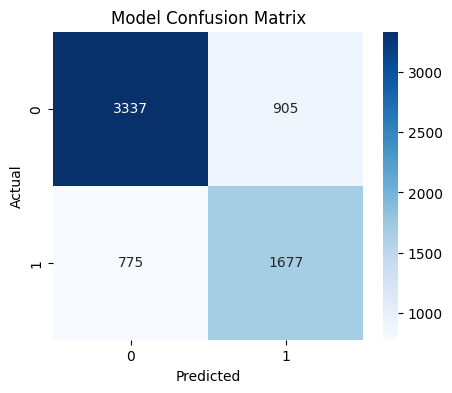

In [ ]:
# -----------------------
# MLPClassifier
# -----------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    classification_report
)

pipe_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier(max_iter=2000, random_state=42))
])

param_grid_mlp = {
    'clf__hidden_layer_sizes': [(256,), (128,), (64,)],
    'clf__early_stopping': [True]
}

gs_mlp = GridSearchCV(pipe_mlp, param_grid_mlp, cv=cv, scoring=scoring, n_jobs=-1, verbose=1)
gs_mlp.fit(X_train, y_train)

print("\n=== MLP ===")
print("Best CV score:", gs_mlp.best_score_)
print("Best params:", gs_mlp.best_params_)
evaluate_model(gs_mlp.best_estimator_, X_test, y_test)

### **Neural Network With Different Activation Functions**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# -----------------------
# Build Model
# -----------------------

num_features = X_train_scaled.shape[1]

def build_model(num_features, hidden_layers, activation='relu', dropout_rate=0.3, lr=0.001):

    model = keras.Sequential()
    model.add(layers.Input(shape=(num_features,)))

    for units in hidden_layers:
        model.add(layers.Dense(units, activation=activation))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout_rate))

    # output layer
    model.add(layers.Dense(1, activation='sigmoid'))

    # compile
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [ ]:
# -----------------------
# 3 Hidden Layer with Relu
# -----------------------

model = build_model(
    num_features=num_features,
    hidden_layers=[256, 128, 64],
    activation='relu',
    dropout_rate=0.3,
    lr=0.001
)

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.1,
    verbose=1
)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6413 - loss: 0.7301 - val_accuracy: 0.6871 - val_loss: 0.5683
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6965 - loss: 0.5838 - val_accuracy: 0.6987 - val_loss: 0.5425
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7101 - loss: 0.5551 - val_accuracy: 0.7259 - val_loss: 0.5202
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7182 - loss: 0.5366 - val_accuracy: 0.7364 - val_loss: 0.4998
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7265 - loss: 0.5204 - val_accuracy: 0.7468 - val_loss: 0.4908
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7279 - loss: 0.5119 - val_accuracy: 0.7506 - val_loss: 0.4818
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7318 - loss: 0.4984 - val_accuracy: 0.7476 - val_loss: 0.4795
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7391 - loss: 0.4997 - val_accuracy: 0.7450 - v

In [ ]:
# -----------------------
# 4 Hidden Layer with Relu
# -----------------------
model = build_model(
    num_features,
    hidden_layers=[512, 256, 128, 64],
    activation='relu',
    dropout_rate=0.2,
    lr=0.0005
)

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.1,
    verbose=1
)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.6358 - loss: 0.7120 - val_accuracy: 0.7005 - val_loss: 0.6111
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7093 - loss: 0.5760 - val_accuracy: 0.6904 - val_loss: 0.5791
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7171 - loss: 0.5459 - val_accuracy: 0.7296 - val_loss: 0.5468
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7226 - loss: 0.5331 - val_accuracy: 0.7289 - val_loss: 0.5222
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7301 - loss: 0.5201 - val_accuracy: 0.7308 - val_loss: 0.5070
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7347 - loss: 0.5072 - val_accuracy: 0.7375 - val_loss: 0.4962
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7385 - loss: 0.5044 - val_accuracy: 0.7461 - val_loss: 0.4861
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7415 - loss: 0.4988 - val_accuracy: 0.7427 - v

In [ ]:
# -----------------------
# 3 Hidden Layer with Tanh
# -----------------------

model = build_model(
    num_features,
    hidden_layers=[256, 128, 64],
    activation='tanh',
    dropout_rate=0.3
)

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.1,
    verbose=1
)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6589 - loss: 0.7124 - val_accuracy: 0.7203 - val_loss: 0.5215
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6983 - loss: 0.5883 - val_accuracy: 0.7244 - val_loss: 0.5086
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7073 - loss: 0.5523 - val_accuracy: 0.7323 - val_loss: 0.4991
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7212 - loss: 0.5315 - val_accuracy: 0.7349 - val_loss: 0.4956
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7186 - loss: 0.5276 - val_accuracy: 0.7341 - val_loss: 0.4952
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7244 - loss: 0.5172 - val_accuracy: 0.7409 - val_loss: 0.4919
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7247 - loss: 0.5181 - val_accuracy: 0.7371 - val_loss: 0.4941
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7341 - loss: 0.5068 - val_accuracy: 0.7379 - v

### **Neural Network**

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 256)            │         5,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,897 (191.00 KB)

 Trainable params: 48,001 (187.50 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.6401 - loss: 0.7211 - val_accuracy: 0.6934 - val_loss: 0.5683
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7012 - loss: 0.5836 - val_accuracy: 0.7076 - val_loss: 0.5388
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7149 - loss: 0.5439 - val_accuracy: 0.7207 - val_loss: 0.5160
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7191 - loss: 0.5240 - val_accuracy: 0.7341 - val_loss: 0.4990
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7305 - loss: 0.5172 - val_accuracy: 0.7409 - val_loss: 0.4901
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7304 - loss: 0.5067 - val_accuracy: 0.7472 - val_loss: 0.4866
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7322 - loss: 0.5055 - val_accuracy: 0.7435 - val_loss: 0.4815
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7336 - loss: 0.5060 - val_accuracy: 0.7394 - v

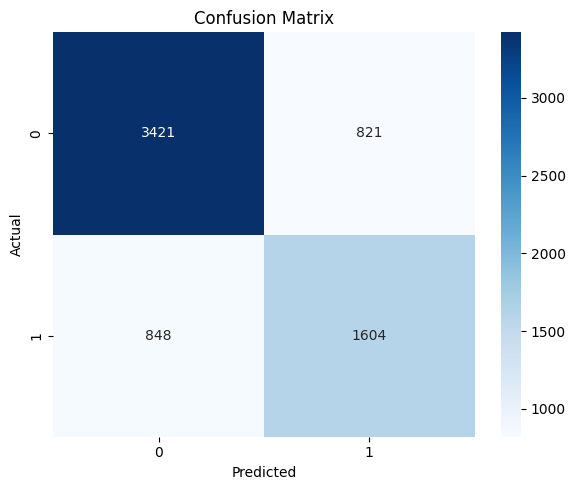

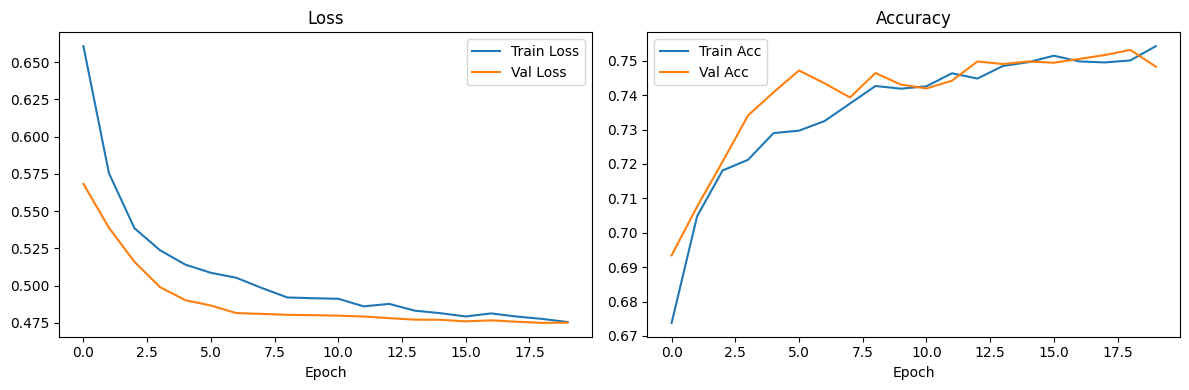

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# -----------------------
# Model Definition
# -----------------------
num_features = X_train_scaled.shape[1]

model = keras.Sequential([
    layers.Input(shape=(num_features,)),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')   # binary output
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# -----------------------
# Training
# -----------------------
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.1,
    verbose=1
)

# -----------------------
# Evaluation
# -----------------------
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("F1 Score:", f1_score(y_test, y_pred))

# -----------------------
# Confusion Matrix
# -----------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# -----------------------
# Plot Loss & Accuracy
# -----------------------
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.legend()

plt.tight_layout()
plt.show()
